# 线性模型


## 线性回归

### 回归问题

之前我们说，当预测值为连续值时，称为“回归问题”，离散值时为“分类问题”。但回归是什么，为什么要叫回归？

线性回归问题就是试图学到一个线性模型尽可能准确地预测新样本的输出值。

输入单一属性的问题，比如通过年龄数据预测一个人身高，输入的属性只有一个，即年龄，往往我们会先得到一系列的有标记数据，例如：[15岁，170cm] …… [20岁，175cm]。

输入多属性的问题，比如预测一个人的收入，输入的属性值就不止一个了，例如：（学历，年龄，性别，颜值，身高，体重）-->15k。回归问题就是要根据这些属性，预测新样本中人的收入。

回归的来源：生物统计学家高尔顿研究父母身高和子女身高时的发现。父亲身高和儿子身高呈正相关关系。而在正相关关系背后还有另一个现象：矮个子父亲的儿子更可能比父亲高；而高个子父亲的儿子更可能比父亲矮。高尔顿对此研究后得出的解释是自然界有一种约束力，使人类身高在一定时期是相对稳定的。如果父母身高（或矮了），其子女比他们更高（矮），则人类身材将向高、矮两个极端分化。自然界不这样做，它让身高有一种回归到中心的作用。



他当时给出了一个回归的式子，y 和 x 分别代表以英寸为单位的子代和父代的身高：

$$
y = 3.78+0.516 x
$$
即使父母的身高都很高，其子女不见得会比父母高，而可能会衰退（regression）（回归）至平均身高的倾向。虽然之后的x 与 y 变量之间并不总是具有“衰退”（回归）关系，但是为了纪念高尔顿这位伟大的统计学家，“线性回归”这一名称就保留了下来。

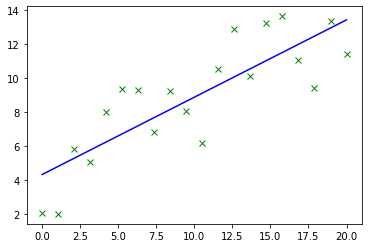

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 20)
y = 3.78+ 0.516 * x
trainning_set = y + np.random.randn(y.shape[-1]) * 2
plt.plot(x, trainning_set, 'gx')

coeff = np.polyfit(x, trainning_set, 1)
poly1 = np.polyval(coeff, x)
plt.plot(x, poly1, 'b')

plt.show()

###  线性模型假设

假设内容：输入变量 x 的各个属性（分量）在对应的输出变量 y 中有不同的权值，或者说，输入变量的各个分量的线性组合来拟合 y 值。

$\mathbf{x} = (x_1, x_2, \cdots, x_n)$ 是一个实例，$x_i$ 代表了实例在第 i 个属性上的取值。我们通常令 $x_0 = 1$：
$$
h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}=\sum_{i=0}^{n} w_{i} \cdot x_{i}
$$
**线性模型最大优点不是计算方便，而是易于解释。**一些 SOTA(state of the art) 的模型里面也经常组合使用线性模型。


我们确定了模型假设，那么接下来就是确定模型的参数。

![](https://gitee.com/xrandx/blog-figurebed/raw/master/img/20210310192340.jpeg)

在训练集上确定系数 $w_i$ 时，预测输出 h(x) 和真实输出 y 之间的误差是关注的核心指标。

<img src="https://gitee.com/xrandx/blog-figurebed/raw/master/img/20210310192643.png" alt="image-20210310192643787" style="zoom:50%;" />

在线性回归中，我们常常以均方误差 (MSE) 来作为模型误差。当线性回归的模型为二维平面上的直线时，均方误差就是预测输出和真实输出之间的欧几里得距离，也就是向量长度（ 或者说向量的 L2 范数）。而以使均方误差取得最小值为目标的模型求解方法就是最小二乘法。平方则是为了得到证书，因此它可以刻画样本点与直线之间的距离。

所以线性模型的泛化误差 $E_{\mathrm{out}}(h)$ ，其中 $(\mathbf{x}, y)$ 是未知的样本：
$$
E_{\mathrm{out}}(h)=\mathbb{E}\left[(h(\mathbf{x}) - y)^{2}\right]
$$
经验误差就是：
$$
E_{\mathrm{in}}(h)=\frac{1}{N} \sum_{i=1}^{N}\left(h\left(\mathbf{x}_{i}\right) - y_{i}\right)^{2}
$$
于是我们得到了最终目标 $\mathbf{w}^*$：
$$
\begin{array}{l}
\mathbf{w}^{*}=  \underset{\mathbf{w}}{\arg \min } E_{\mathrm{in}}(h)
\end{array}
$$
式中每个 $x_i$ 代表训练集中的一个样本。

求偏导以得出最值，粗体是向量或矩阵：
$$
\begin{aligned}

E_\mathrm{in}(h) 
& = E_\mathrm{in}(\mathbf{w}) \\
& = \frac{1}{N}\sum^N_{i=1}(\mathbf{w^\top} \mathbf{x_i}  - {y_i})^2 \\
&=  \frac{1}{N}\sum^N_{i=1}(\mathbf{x_i^\top} \mathbf{w}   - {y_i})^2 \\
&=   \frac{1}{N} \left \|
\begin{aligned}
&\mathbf{x_1^\top} \mathbf{w} -   {y_1} \\
&\mathbf{x_2^\top} \mathbf{w} -   {y_2} \\
&\cdots \\
&\mathbf{x_N^\top} \mathbf{w} -   {y_N} \\
\end{aligned}
\right \| ^2 \\

&=   \frac{1}{N} \left \|
\begin{aligned}
\left [  \begin{aligned} \mathbf{x_1^\top} \\ \mathbf{x_2^\top} \\ \cdots \\ \mathbf{x_N^\top} \\ \end{aligned} \right ]  \mathbf{w} - 
\left [ \begin{aligned}  {y_1} \\ {y_2} \\ \cdots \\ {y_N} \\ \end{aligned} \right ] \end{aligned}
\right \| ^2 \\ 
& = \frac{1}{N}  \| \mathbf{X}\mathbf{w} - \mathbf{y} \| ^2
 
\end{aligned}
$$

目标变成了：
$$
\begin{aligned} 
\mathbf{w}^{*} &=\underset{\mathbf{w}}{\arg \min }  \frac{1}{N}  \| \mathbf{X}\mathbf{w} - \mathbf{y} \| ^2 \\
\\ &=\underset{\mathbf{w}}{\arg \min }   \frac{1}{N} \left(  \mathbf{w^\top} \mathbf{X^\top} \mathbf{X} \mathbf{w} - 2 \mathbf{w^\top} \mathbf{X^\top} \mathbf{y}  + \mathbf{y^\top}\mathbf{y}
\right)
\end{aligned}
$$
求偏导：
$$
\frac{\partial E_\mathrm{in}(\mathbf{w})} {\partial \mathbf{w}} = 
2 \mathbf{X^\top} \mathbf{X} \mathbf{w} - 2\mathbf{X^\top} \mathbf{y}
$$
令其为0 ，考虑到矩阵不可逆（伪逆），得出：
$$
\mathbf{w^*}  =  (\mathbf{X^\top} \mathbf{X} )^{-1} \mathbf{X^\top} \mathbf{y}
= X^\dagger \mathbf{y}
$$
在单变量线性回归任务中，最小二乘法的作用就是找到一条直线，使所有样本到直线的欧式距离之和最小。说到这里，问题就来了：凭什么使均方误差最小化的参数就是和训练样本匹配的最优模型呢？

## 为什么线性模型是可行的？

### 几何意义

最开始模型是 $h(\mathbf{x})=\mathbf{w}^\top \mathbf{x}=\sum_{i=0}^{n} w_{i} \cdot x_{i}$ ，注意我们通常令 $x_0 = 1$ ，如果我们改变一下字母就可以得到：
$$
h(\mathbf{x})=1 \cdot \beta_{0}+\sum_{j=1}^{n} x_{j} \cdot \beta_{j}=\mathbf{x}^{\top} \boldsymbol{\beta}
$$
其实这里偷偷地把 $\mathbf{x}$ 变成了它的转置（虽然输出的结果没有不同）。$\mathbf{w}^\top \mathbf{x}$ 背后的寓意是每个包含若干输入属性和一个输出结果的样本都被视为一个整体，误差分散在不同的样本点上；而当输出被写成 $\mathbf{x}^\top \boldsymbol{\beta}$ 时，每个单独属性在所有样本点上的取值被视为一个整体，误差分散在每个不同的属性上。

先假设有 $N$ 个实例，那么 $x^\top$ 就变成了 $N×(n+1) $ 维的数据矩阵 $X$，它的每一行表示的都是同一个样本的不同属性，每一列则表示不同样本中的相同属性。如果待拟合数据的特性完美到任意两个属性都线性无关的话，$X$ 就可以看成一个由它的所有列向量所张成的空间。

一般来说，属性的数目 $n$ 会远远小于数据的数目 $N$，因此 $X$ 张成的是 $N$ 维空间之内的 n 维生成子空间，或者叫 n 维超平面。这个超平面的每一个维度都对应着数据集的一个列向量。理想条件下，输出 y 作为属性的线性组合，也应该出现在由数据属性构成的超平面上。但受噪声的影响，真正的 y 是超平面之外的一个点，这时就要退而求其次，在超平面上找到离 y 最近的点作为最佳的近似。

<img src="https://gitee.com/xrandx/blog-figurebed/raw/master/img/20210310195136.png" alt="下载" style="zoom:50%;" />


## 线性几率回归

## 线性判别分析